# **The goal of collecting this dataset**

The goal is to classify Mobile Prices based on mobile specifications. The data will be classified into four categories {0, 1, 2, 3}, and each category indicates the related Mobile specifications with other phones will be classified to the same price range. where  0 indicates a low price, 1 indicates an intermediate price closer to low, 2 indicates an intermediate price closer to high, and 3 indicates a high price.

# **The source of the dataset**
The dataset is called Mobile Price Classification, which we got from Kaggle.com by downloading the CSV file. It is data for classifying mobiles based on its specification into four ranges of price. 
URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as plex
import collections
from collections import Counter
import bidi.algorithm
from bidi.algorithm import get_display
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score, f1_score,  precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold #GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from datetime import datetime
from datetime import timedelta
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
#df stands for data frame

# **Number of rows and columns in the dataset**

In [3]:
nRow, nCol = df.shape
f'There are {nRow} rows and {nCol} columns in train dataset'

'There are 2000 rows and 21 columns in train dataset'

# **About the Dataset**

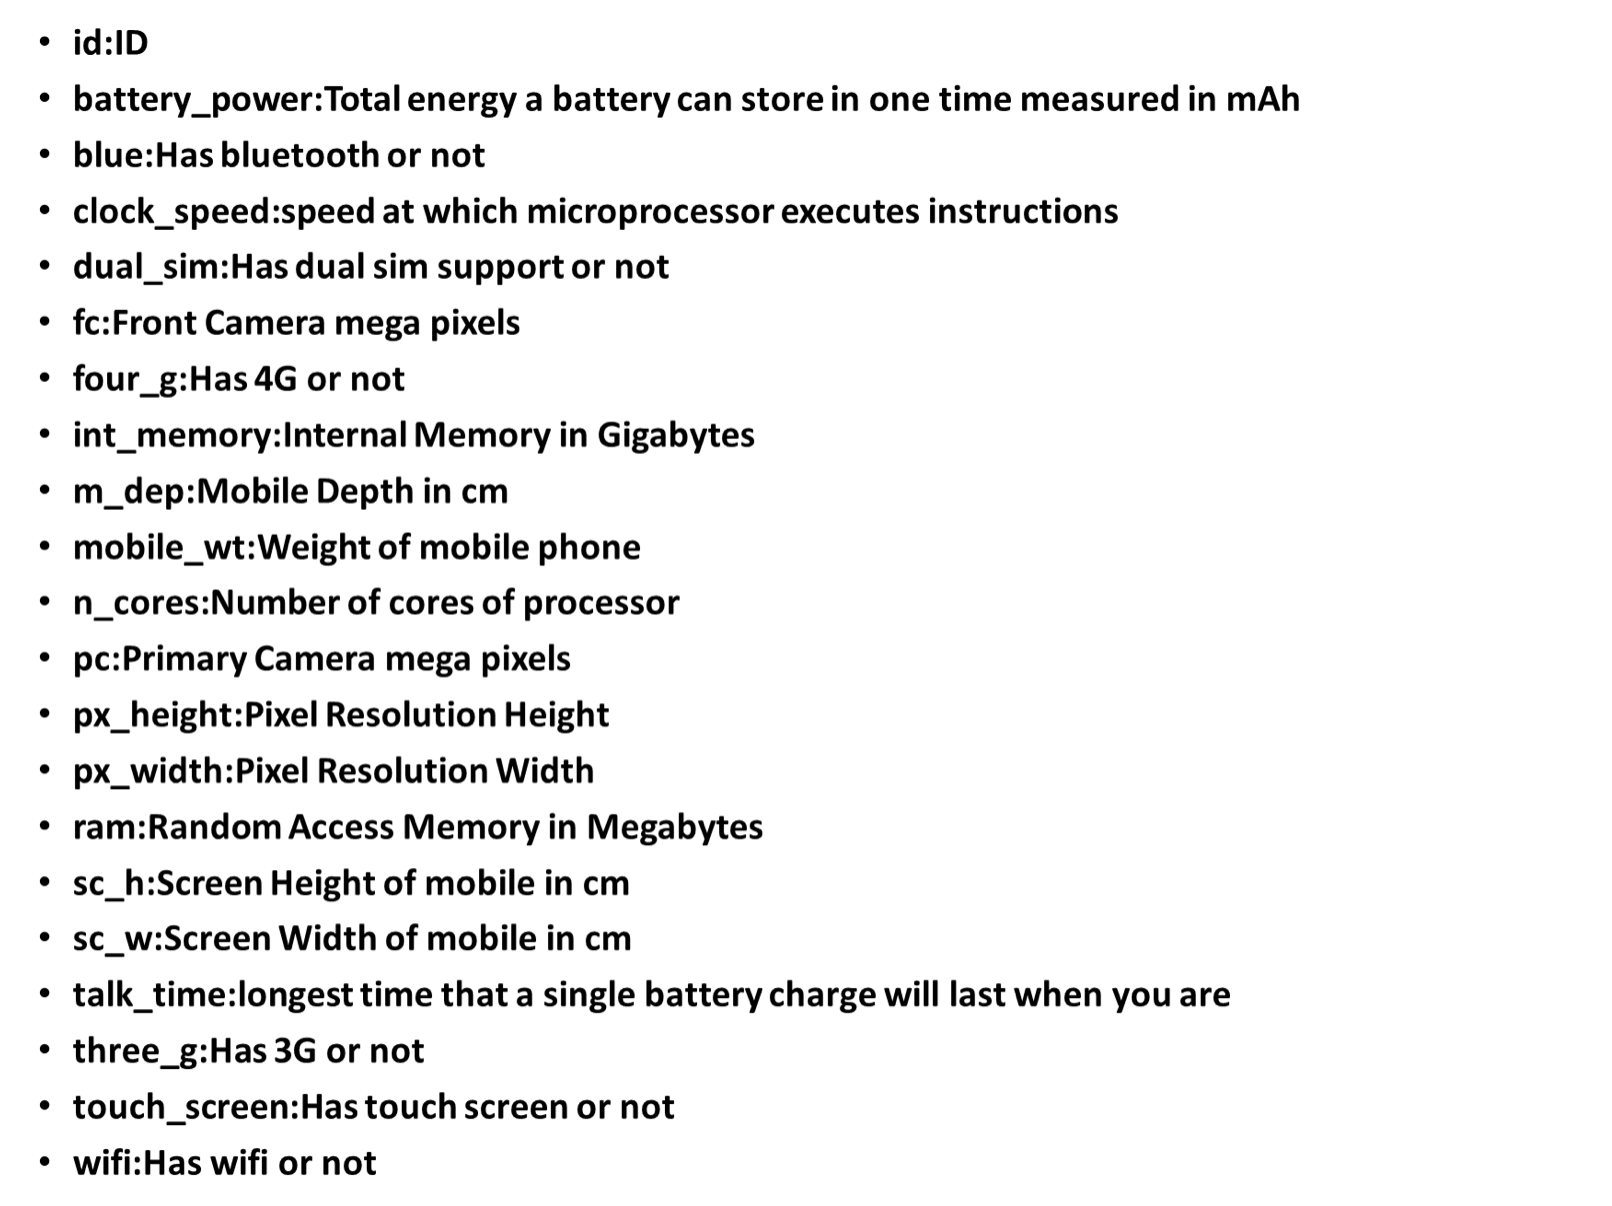

# **Sample of 5 observations from the dataset**

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# **Data type of each column**

In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# **Missing values**

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# **Checking Duplicate Values**

In [7]:
df.duplicated().sum()

0

# **statistical summary of each column**

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
variance = np.var(df)
print("Variance of the dataset:")
variance

Variance of the dataset:


battery_power    1.929918e+05
blue             2.499750e-01
clock_speed      6.655299e-01
dual_sim         2.499098e-01
fc               1.883871e+01
four_g           2.495378e-01
int_memory       3.291023e+02
m_dep            8.314194e-02
mobile_wt        1.252509e+03
n_cores          5.231580e+00
pc               3.675753e+01
px_height        1.968429e+05
px_width         1.867030e+05
ram              1.176055e+06
sc_h             1.774256e+01
sc_w             1.896871e+01
talk_time        2.983988e+01
three_g          1.816178e-01
touch_screen     2.499910e-01
wifi             2.499510e-01
price_range      1.250000e+00
dtype: float64

# **variables disturbution**

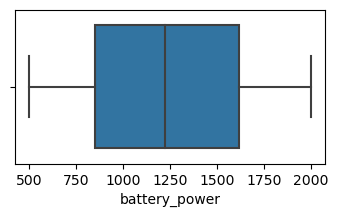

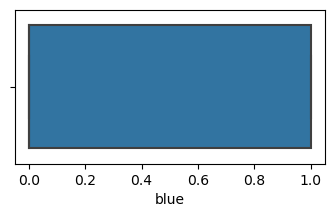

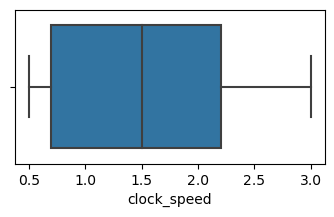

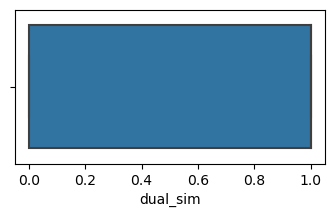

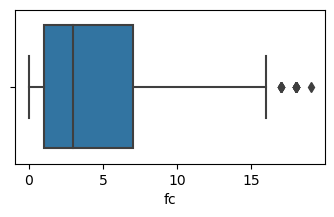

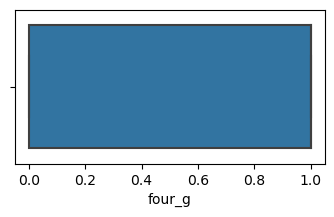

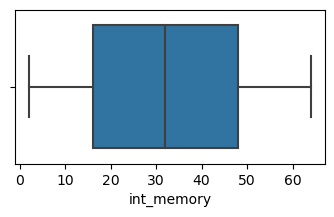

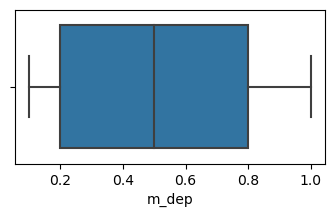

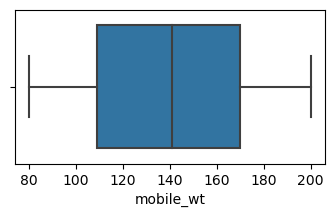

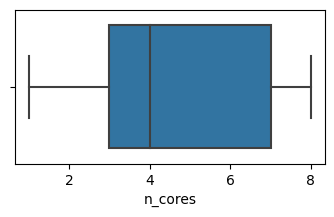

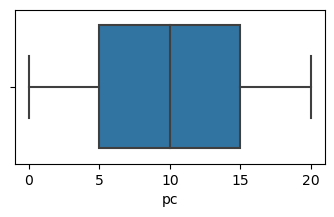

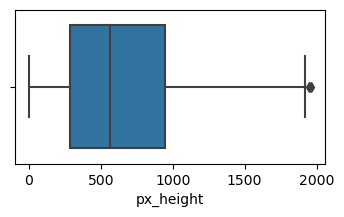

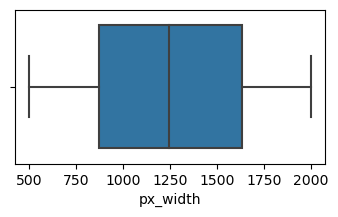

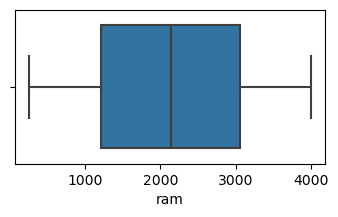

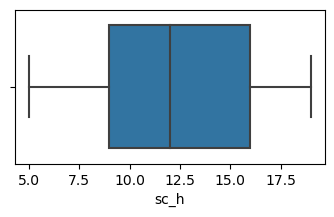

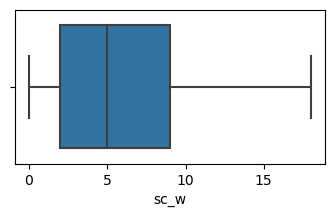

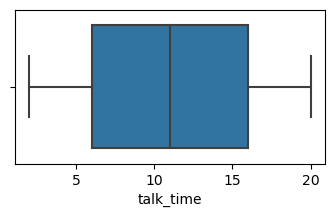

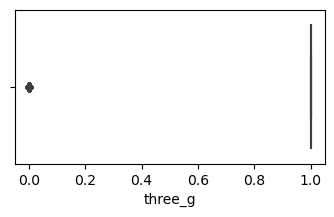

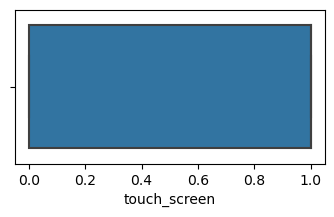

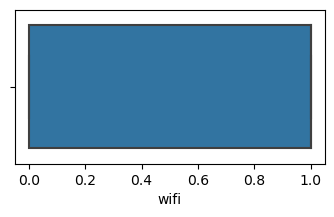

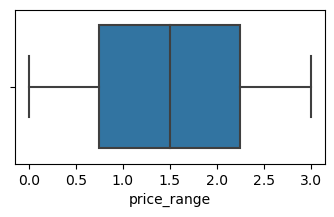

In [10]:
for i in df.columns:
    plt.figure(figsize = (4,2))
    sns.boxplot(data = df,x = i)
    plt.show()

****From the above graph it is clear that there is no outlier in any feature and all are in range.***

<AxesSubplot:ylabel='three_g'>

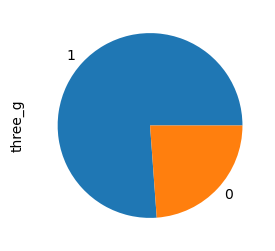

In [11]:
pie=df['three_g'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='price_range'>

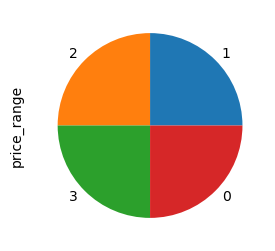

In [12]:
pie=df['price_range'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='blue'>

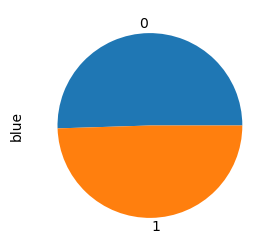

In [13]:
pie=df['blue'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='dual_sim'>

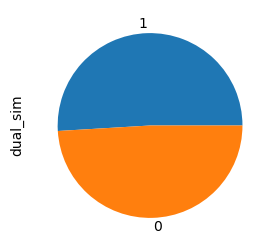

In [14]:
pie=df['dual_sim'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='four_g'>

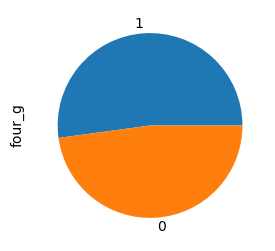

In [15]:
pie=df['four_g'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='four_g'>

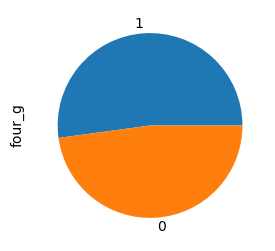

In [16]:
pie=df['four_g'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='touch_screen'>

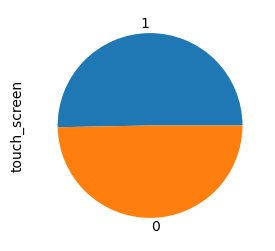

In [17]:
pie=df['touch_screen'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

<AxesSubplot:ylabel='wifi'>

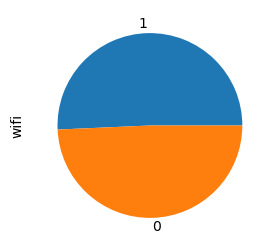

In [18]:
pie=df['wifi'].value_counts()
plt.figure(figsize = (6,3))
pie.plot(kind = "pie")

****There's a quite a symmetrical distribution in the variables above except the variable three_g***

# 

# **variable disturbution using histogram**

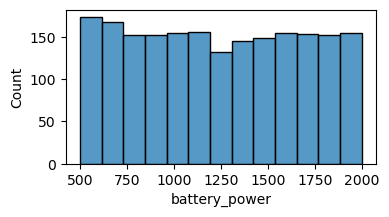

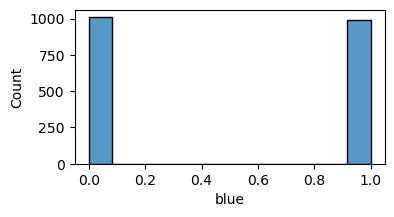

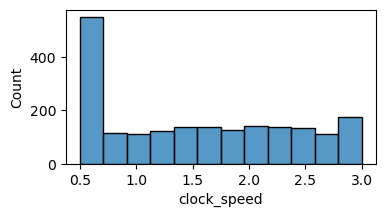

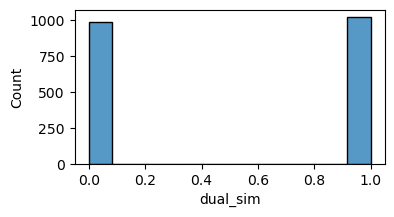

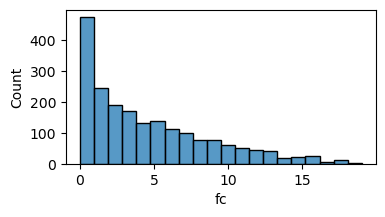

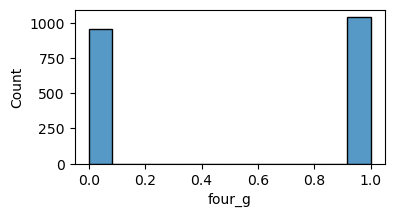

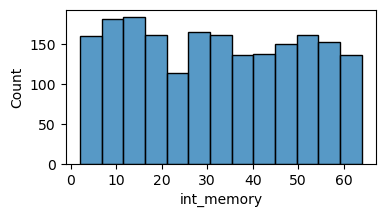

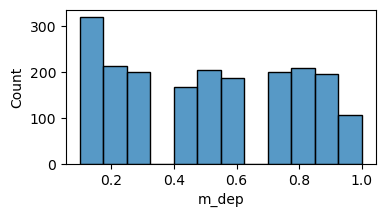

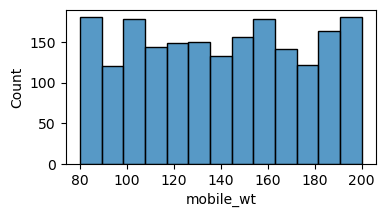

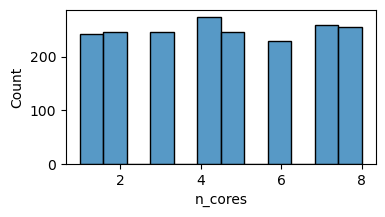

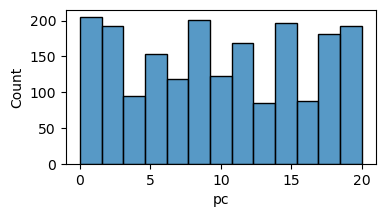

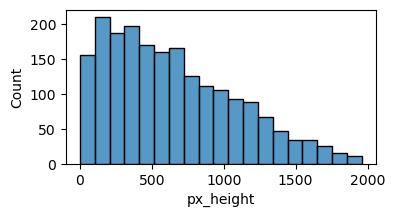

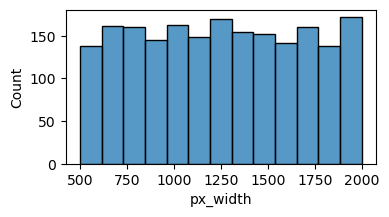

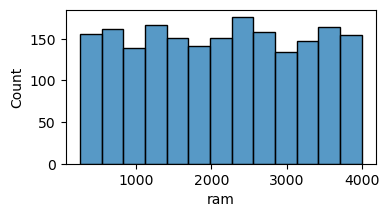

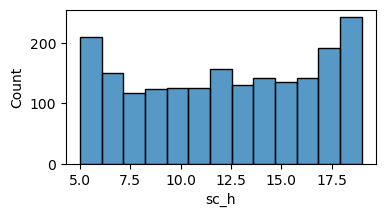

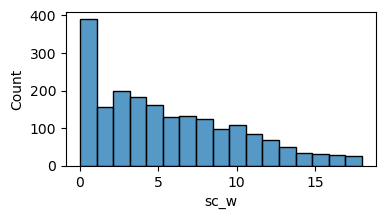

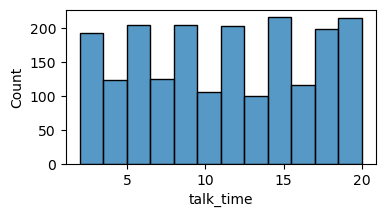

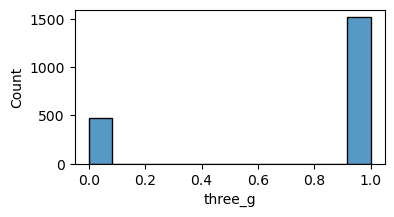

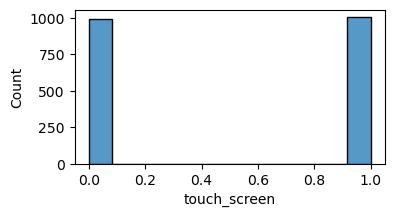

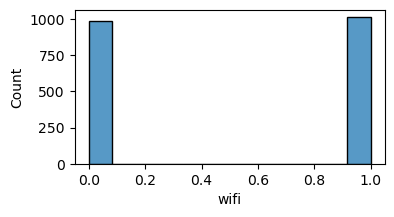

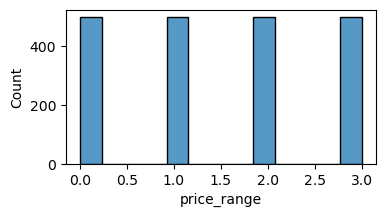

In [19]:
for i in df.columns:
    plt.figure(figsize = (4,2))
    sns.histplot(data = df,x = i)
    plt.show()

****According to the graphs above it was obseerbed that:***
- There is a wide range of battery power, int_memmory(Internal memory), talk_time, m_depth(Mobile depth), mobile_wt(Mobile width), n_cores(Number of cores), pc(Primary camera), px_width(Pixel resolution width), ram, sc_h(Screen hight), wifi, touch screen and price_range.

- Majority of mobile phones have three_g(3G), sc_w(Screen width) with 0cm, px_height(Pixel resolution width) with more than 1000 pixels, fc(Front camera) with 0 mega pixels, clock speed with 0.5.

- The distribution of fc(Front camera), px_height(Pixel resolution height), sc_w(Screen width) are left skewed 

# **Correlation between Variables**

In [20]:
cols = df.corr().nlargest(10,'price_range')['price_range'].index

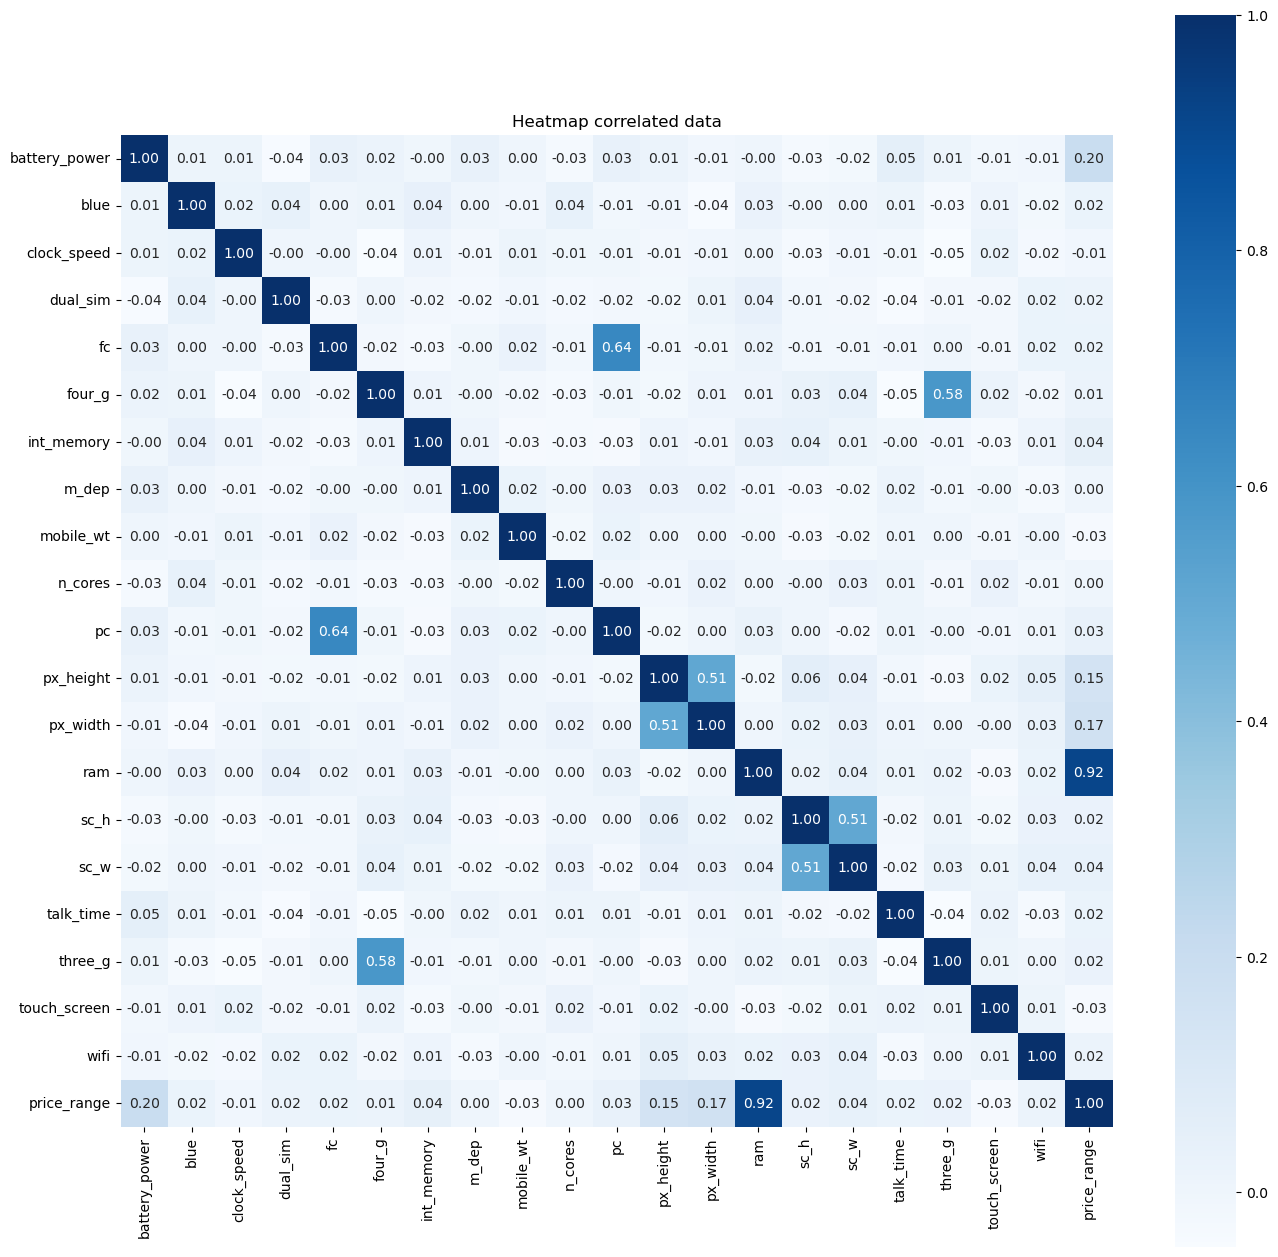

In [21]:
plt.figure(figsize=(16,16))
ax= plt.axes()
sns.heatmap(df.corr(),cmap = 'Blues',cbar=True, annot=True, square=True, fmt='.2f',ax=ax)
ax.set_title('Heatmap correlated data')
plt.show()

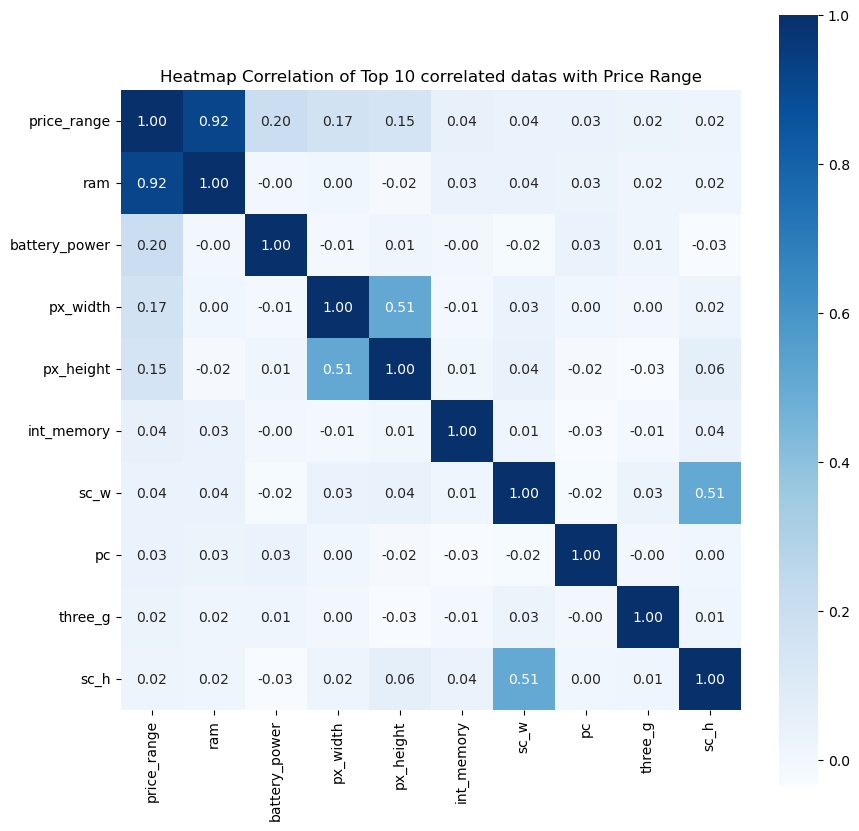

In [22]:
plt.figure(figsize=(10,10))
ax= plt.axes()
sns.heatmap(df[cols].corr(),cmap = 'Blues',cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax = ax)
ax.set_title('Heatmap Correlation of Top 10 correlated datas with Price Range')
plt.show()

***According to the graph above:***

there's correlation between px_height(pixel resolution hight) and px_width(pixel resolution width), sc_w(screen hight) and sc_h(screen width), and a hight correlation between price_range and ram 

# **Data prepocessing**

- # Variable transformation, Discretization:
Our data does not need variable transformation or discretization.

- # Values removal:
As mentioned above, there are no missed values nor duplicated values. So, there is no need for values removal.

- # Variables removal:
The last figure above shows the top 10 correlated data with the price range, which are: 'price_range', 'ram', 'battery_power', 'px_width', 'px_height', 'int_memory', 'sc_w', 'pc', 'three_g', and 'sc_h' .
So, for best results we can reduce the dimensions of our data by removing the less correlated variables.

In [23]:
# top 10 correlated variables with price_range
df = df[['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h']] 


In [24]:
df.head()

,price_range,ram,battery_power,px_width,px_height,int_memory,sc_w,pc,three_g,sc_h
0,1,2549,842,756,20,7,7,2,0,9
1,2,2631,1021,1988,905,53,3,6,1,17
2,2,2603,563,1716,1263,41,2,6,1,11
3,2,2769,615,1786,1216,10,8,9,1,16
4,1,1411,1821,1212,1208,44,2,14,1,8


- # Normalization:
1- [This website](https://sender11.typepad.com/sender11/2008/04/mobile-screen-s.html) shows that the minimum screen resolution in px for mobile phones since 2005 is 96x65. So, we will check our data if there exist resolutions less than 96x65 and we will replace them with 96x65.

In [25]:
print('mobiles that have px_height less than 96: ',len(df[(df['px_height']<96)]))
print('mobiles that have px_width less than 65: ',len(df[(df['px_width']<65)]))
print('------------------------------------------------------------')

mobiles that have px_height less than 96:  143
mobiles that have px_width less than 65:  0
------------------------------------------------------------


In [26]:
df['px_height'].replace(df['px_height'][(df['px_height']<128)].values,128,inplace=True)


2- [This link](https://www.amazon.com/t2-Worlds-Smallest-Travelling-Manufacturer/dp/B08NG5QLZZ/ref=sr_1_5?keywords=world+smallest+phone&qid=1682465051&sr=8-5) shows the world smallest phone with approximately 4.5 cm as screen height and 2 cm as screen width. So, we will check our data if there exist screen height / width less than these values and we will replace them.

In [27]:
print('mobiles that have sc_h less than 4.5: ',len(df[(df['sc_h']<4.5)]))
print('mobiles that have sc_w less than 2: ',len(df[(df['sc_w']<2)]))
print('------------------------------------------------------------')

mobiles that have sc_h less than 4.5:  0
mobiles that have sc_w less than 2:  390
------------------------------------------------------------


In [28]:
df['sc_w'].replace(df['sc_w'][(df['sc_w']<2)].values,2,inplace=True)

- # Exporting preprocessed data:


In [29]:
df.to_csv('preprocessed_data.csv',index=False)

# 

# **Phase 2 (Supervised learning)**

# **1- Random Forest**

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It is a Machine Learning algorithm that tackles one of the biggest problems with Decision Trees: variance.
To train and test:

The data set contains 2000 records total, using the holdout evaluation method technique, we have divided the dataset into 20% for testing and 80% for training

All the required Python libraries have been imported in the project in order to
manipulate the data effectively.

In [30]:
#All the required python libraries have been 
#imported in order to manipulate the data effectively.

import numpy as np # linear algebra
import pandas as pd
from sklearn import metrics
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,StandardScaler

In [31]:
#Features
X = df.drop('price_range',axis=1)
#Target
y = df['price_range']

In [32]:
# Assigning 0.2 as a test size
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
# Scale the training and test data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Development and Prediction**

In [34]:
random_forest = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=5)
random_forest.fit(X_train_scaled, y_train)
y_pred = random_forest.predict(X_test_scaled)

**For evaluation, we used confusion matrix:
Where 0 indicates a low price, 1 indicates an intermediate price closer to low, 2 indicates an intermediate price closer to high, and 3 indicates a high price**

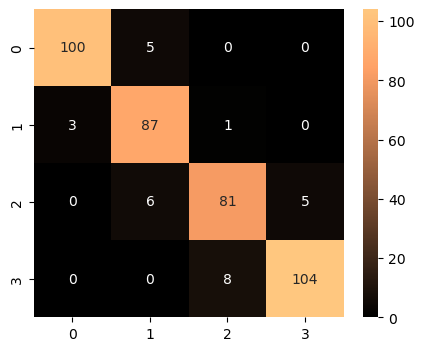

In [35]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
confusion_M=pd.DataFrame(data=cm,columns=['0','1','2','3'],index=['0','1','2','3'])

# set size of the plot
plt.figure(figsize = (5,4))

# plot a heatmap
sns.heatmap(confusion_M, annot=True,fmt='d',cmap="copper")
plt.show()

In [36]:
Rep = classification_report(y_test, y_pred)
print(Rep)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.89      0.96      0.92        91
           2       0.90      0.88      0.89        92
           3       0.95      0.93      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



Calculation of True Positive(TP), True Negative(TN), False Positive(FP) and False Negative(FN)
Of each classification in order to get Error Rate, Sensitivity, Specificity and Percision

In [37]:
confusion = metrics.confusion_matrix(y_test, y_pred)
Price0TP = confusion[0,0]
Price1TP = confusion[1,1]
Price2TP = confusion[2,2]
Price3TP = confusion[3,3]
TP = Price0TP + Price1TP + Price2TP + Price3TP

Price0TN = confusion[1,1]+confusion[1,2]+confusion[1,3]+confusion[2,1]+confusion[2,2]+confusion[2,3]+confusion[3,1]+confusion[3,2]+confusion[3,3]
Price1TN = confusion[0,0]+confusion[0,2]+confusion[0,3]+confusion[2,0]+confusion[2,2]+confusion[2,3]+confusion[3,0]+confusion[3,2]+confusion[3,3]
Price2TN = confusion[0,0]+confusion[0,1]+confusion[0,3]+confusion[1,0]+confusion[1,1]+confusion[1,3]+confusion[3,0]+confusion[3,1]+confusion[3,3]
Price3TN = confusion[0,0]+confusion[0,1]+confusion[0,2]+confusion[1,0]+confusion[1,1]+confusion[1,2]+confusion[2,0]+confusion[2,1]+confusion[2,2]
TN = Price0TN + Price1TN + Price2TN + Price3TN

Price0FN = confusion[0,1]+confusion[0,2]+confusion[0,3]
Price1FN = confusion[1,0]+confusion[1,2]+confusion[1,3]
Price2FN = confusion[2,0]+confusion[2,1]+confusion[2,3]
Price3FN = confusion[3,0]+confusion[3,1]+confusion[3,2]
FN = Price0FN + Price1FN + Price2FN + Price3FN

Price0FP = confusion[1,0]+confusion[2,0]+confusion[3,0]
Price1FP = confusion[0,1]+confusion[2,1]+confusion[3,1]
Price2FP = confusion[0,2]+confusion[1,2]+confusion[3,2]
Price3FP = confusion[0,3]+confusion[1,3]+confusion[2,3]
FP = Price0FP + Price1FP + Price2FP + Price3FP

# **Calculations based on the confusion matrix:**

**Classification Error: Overall, how often is the classifier incorrect? Also known as "Misclassification Rate"**


In [38]:
print((FP + FN) / (TP + TN + FP + FN))

0.035


**Sensitivity: When the actual value is positive, how often is the prediction correct? How "sensitive" is the classifier to detecting positive instances? Also known as "True Positive Rate" or "Recall"**

In [39]:
recall = TP / (TP + FN)
print(recall)

0.93


**Specificity: When the actual value is negative, how often is the prediction correct? How "specific" (or "selective") is the classifier in predicting positive instances?**

In [40]:
print(TN / (TN + FP))

0.9766666666666667


**Precision: When a positive value is predicted, how often is the prediction correct? How "precise" is the classifier when predicting positive instances?**

In [41]:
print(TP/(TP+FP))

0.93


**Observations on Random Forest classifier:**

All the measurements (Accuracy - Precision - Recall - F1 - Specificity) values ranged from 91% to 97% which considered to be relatively good, also for error rate value is 4.25% which considered to be relatively low.
The classifier correctly classified 372 values, while 56 incorrectly classified, indicating a good classification with a difference of 316.

# 

# **2- Logistic Regression**

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting categorical dependent variables using a given set of independent variables.

The data set contains 2000 records , using holdout evaluation method technique, we have divided the dataset into 20% for testing and 80% for training

In [42]:
#Reading the dataset in csv format
df=pd.read_csv('/kaggle/working/preprocessed_data.csv')

In [43]:
#Features
X = df.drop('price_range',axis=1)
#Target
y = df['price_range']

In [44]:
# Assigning 0.2 as a test size
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [45]:
#Preprocessing method
scaler = StandardScaler()

In [46]:
#Fit and transform the Column Transformer in the train set
train_array = scaler.fit_transform(x_train)

#Transform the Column Transformer in the train set
test_array = scaler.transform(x_test)

# **Model Development and Prediction**

**Import the Scikit Learn Logistic Regression module Fit model on the train set using fit() then perform prediction on test set using prediction.**

In [47]:
#Fitting the model in the train set, Training the model using Logistic Regression
logit = LogisticRegression().fit(train_array, y_train)

#Predict the function in the train set
y_pred_train = logit.predict(train_array)

#Predict the function in the test set
y_pred_test = logit.predict(test_array)

print('\n')
print("classification Report")
print('\n')
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')

#Getting the accuracy of the model using Logistic Regression
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("Test Accuracy", accuracy_score(y_test, y_pred_test))
print('\n')
print('Accuracy considered as Good Fit')
print('\n')




classification Report


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        95
           1       0.94      0.96      0.95        92
           2       0.95      0.94      0.94        99
           3       0.97      0.96      0.97       114

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



Train Accuracy 0.9625
Test Accuracy 0.9575


Accuracy considered as Good Fit




**For evaluation, we used confusion matrix:
Where 0 indicates a low price, 1 indicates an intermediate price closer to low, 2 indicates an intermediate price closer to high, and 3 indicates a high price**

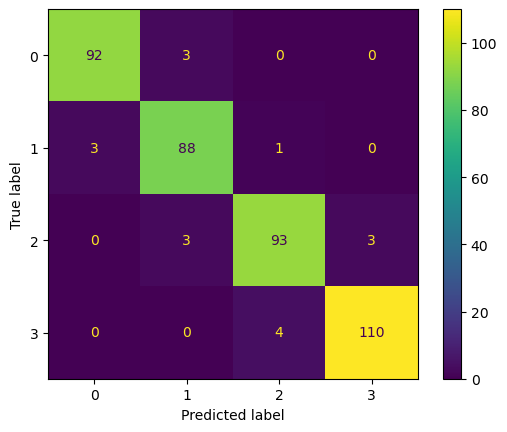

In [48]:
ConfusionMatrixDisplay.from_estimator(logit,test_array ,y_test);

Calculation of True Positive(TP), True Negative(TN), False Positive(FP) and False Negative(FN)
Of each classification in order to get Error Rate, Sensitivity, Specificity and Percision

In [49]:
confusion = metrics.confusion_matrix(y_test, y_pred_test)
Price0TP = confusion[0,0]
Price1TP = confusion[1,1]
Price2TP = confusion[2,2]
Price3TP = confusion[3,3]
TP = Price0TP + Price1TP + Price2TP + Price3TP

Price0TN = confusion[1,1]+confusion[1,2]+confusion[1,3]+confusion[2,1]+confusion[2,2]+confusion[2,3]+confusion[3,1]+confusion[3,2]+confusion[3,3]
Price1TN = confusion[0,0]+confusion[0,2]+confusion[0,3]+confusion[2,0]+confusion[2,2]+confusion[2,3]+confusion[3,0]+confusion[3,2]+confusion[3,3]
Price2TN = confusion[0,0]+confusion[0,1]+confusion[0,3]+confusion[1,0]+confusion[1,1]+confusion[1,3]+confusion[3,0]+confusion[3,1]+confusion[3,3]
Price3TN = confusion[0,0]+confusion[0,1]+confusion[0,2]+confusion[1,0]+confusion[1,1]+confusion[1,2]+confusion[2,0]+confusion[2,1]+confusion[2,2]
TN = Price0TN + Price1TN + Price2TN + Price3TN

Price0FN = confusion[0,1]+confusion[0,2]+confusion[0,3]
Price1FN = confusion[1,0]+confusion[1,2]+confusion[1,3]
Price2FN = confusion[2,0]+confusion[2,1]+confusion[2,3]
Price3FN = confusion[3,0]+confusion[3,1]+confusion[3,2]
FN = Price0FN + Price1FN + Price2FN + Price3FN

Price0FP = confusion[1,0]+confusion[2,0]+confusion[3,0]
Price1FP = confusion[0,1]+confusion[2,1]+confusion[3,1]
Price2FP = confusion[0,2]+confusion[1,2]+confusion[3,2]
Price3FP = confusion[0,3]+confusion[1,3]+confusion[2,3]
FP = Price0FP + Price1FP + Price2FP + Price3FP

# **Calculations based on the confusion matrix:**

**Classification Error: Overall, how often is the classifier incorrect? Also known as "Misclassification Rate"**

In [50]:
print((FP + FN) / (TP + TN + FP + FN))

0.02125


**Sensitivity: When the actual value is positive, how often is the prediction correct? How "sensitive" is the classifier to detecting positive instances? Also known as "True Positive Rate" or "Recall"**

In [51]:
recall = TP / (TP + FN)
print(recall)

0.9575


**Specificity: When the actual value is negative, how often is the prediction correct? How "specific" (or "selective") is the classifier in predicting positive instances?**

In [52]:
print(TN / (TN + FP))

0.9858333333333333


**Precision: When a positive value is predicted, how often is the prediction correct? How "precise" is the classifier when predicting positive instances?**

In [53]:
print(TP/(TP+FP))

0.9575


**Observations on logistic regression classifier:**

We found that logistic regression is easy, fast and simple classification method and we notice that all the measurements (Accuracy - Precision - Recall - F1 - Specificity) values ranged from 95% to 98% which considered to be relatively good, also for error rate value is 0.12% which considered to be relatively low.
The classifier correctly classified 383 values, while 34 incorrectly classified, indicating a good classification with a difference of 351.

#  **Comparison**


In this context, we are comparing the prediction performance of the original
version of random forest with logistic regression.


Using a random forest algorithm can uncover intricate relationships, but this comes at the expense of time. Therefore, if it is determined that a variable has a linear relationship with the outcome, it is recommended to initially investigate the data and attempt to identify any connections between the independent and dependent variables before applying a suitable method.

Logistic regression is a popular approach for addressing problems that are straightforward to implement, and it typically yields a continuous output that represents probability. This algorithm is also resilient to minor data noise and is not significantly impacted by isolated instances of multicollinearity.
    
Overall, random forest classifier performs better with more categorical data than logistic regression.

Based on the table below, the logistic regression  algorithm produces superior output compared to random forest for our dataset.  The overall output of calculations based on the confusion matrix in logistic regression is higher than the output of the random forest. Therefore, this makes logistic regression algorithm a better pick for us .The overall performance  of both algorithms  considered good.

In Logistic regression the accuracy is equal to
96, where in random forest it equals to 0.92 so logistic regression is better.

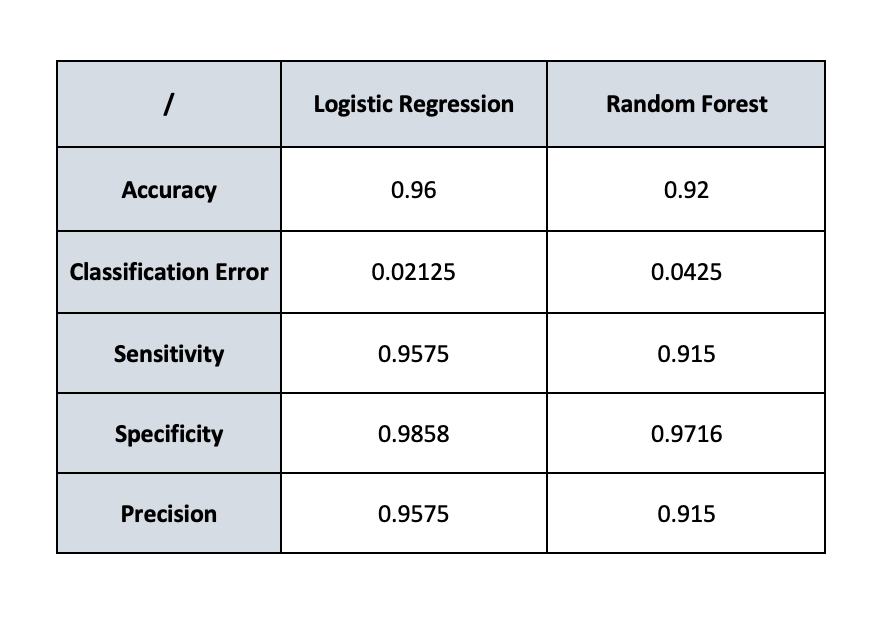

# **Phase 3 (Unsupervised learning)**

**In the unsupervised learning algorithm, we used by K-Means algorithm.  
K-means clustering algorithm is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. It analyzes and groups the unlabeled dataset based on their similarities or differences into K clusters.**

In [54]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans #a library that allow us to use k-means algortithim to the dataset

#Evaluation Metrics
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [55]:
#Reading the dataset in csv format
k_df=pd.read_csv('/kaggle/working/preprocessed_data.csv')

In [56]:
#removing the class label from data before applying clustering
k_x = k_df.drop("price_range", axis=1)
k_y = k_df["price_range"]

**Elbow method:
Since the value of K affects the clustering performance, 
so we will use the Elbow method in order to calculate the WCSS (within-cluster-sum-squares) on each cluster to determine the best value of K.**

The algorithm then will continuously/repeatedly move the centroids to the centers of the samples. This iterative approach minimizes the within-cluster sum of squared errors (SSE), which is often called cluster inertia.

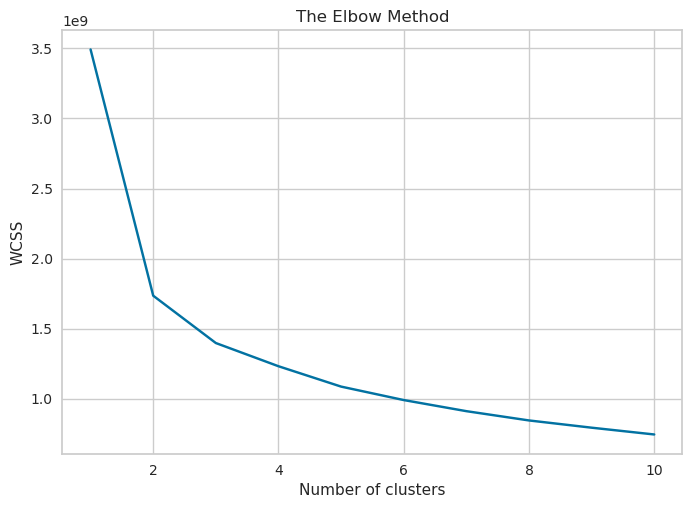

In [57]:
#Elbow method for specifying the best k
K = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =
    300, n_init = 10, random_state = 0)
    kmeans.fit(k_x)
    K.append(kmeans.inertia_)
    
# Plot the graph to visualize 
#the Elbow Method to find the optimal number of cluster
plt.plot(range(1, 11), K)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

****

**Silhouette Coefficient Method: this method is used to assess clusteering quality by analyzing the distance between clusters. The value of the Silhouette Coefficient for all objects is between -1 and 1, the higher value inidicates better k number for clustering**

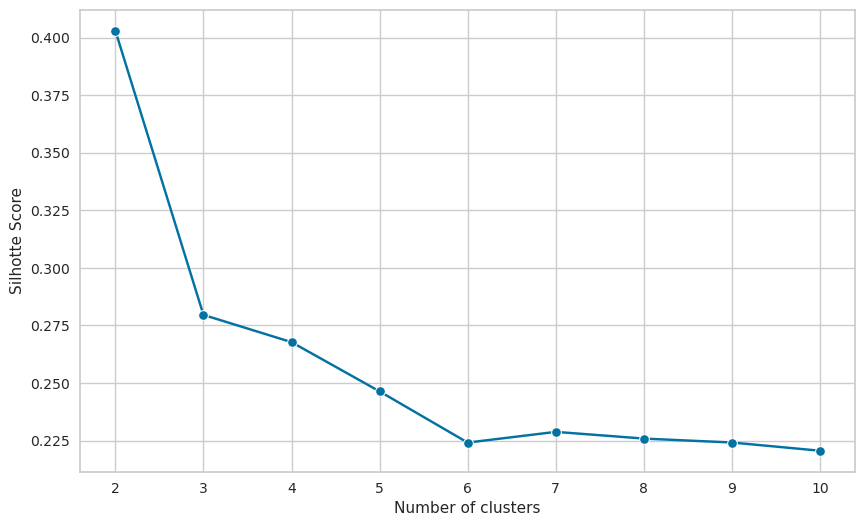

In [58]:
#Plot the curve of the average silgouette coefficent value with respect to the number of clusters
SILHOUETTES =[]
for cluster in range(2,11):
    model = KMeans(
        n_clusters = cluster, init = 'k-means++',
        random_state=42)
    model.fit(k_x)
    labels = model.labels_
    SILHOUETTES.append(silhouette_score(
        k_x,
        labels, metric = 'euclidean'
    ))
inert_df = pd.DataFrame({'Num_Clusters': range(2,11), 'Silhotee':SILHOUETTES})
plt.figure(figsize= (10,6))
sns.lineplot(data = inert_df, x = 'Num_Clusters', y = 'Silhotee', marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhotte Score');

**Based on the Elbow method and the Silhouetee method, we will choose three different values of K:**
- K = 2 since it has a sharp elbow, and very high silhouette 
- k = 3 since it has an elbow, and a high silhouette 
- k = 4 even though it has no elbow, but it has a medium silhouette 

****

# **Applying k-mean algorithm with K=2**

In [59]:
#start with k = 2 
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(k_x)
wscc = kmeans.inertia_
centers = kmeans.cluster_centers_ 
score = silhouette_score(k_x,kmeans.labels_, metric = 'euclidean')
CHI_score = calinski_harabasz_score(k_x, kmeans.labels_)
DB_score = davies_bouldin_score(k_x, kmeans.labels_)

#Within-cluster sum of squares
print('Total within cluster sum of squares for k=2: %.3f' % wscc)
print('-'*50)

#clusters centers
print('clusters centers:')
print(centers)
print('-'*50)

#Silhouetter Score
print('Silhouetter Score of k=2: %.3f' % score)
print('-'*50)

#Calinski-Harabasz Index
print('calinski_harabasz_score of k=2: %.3f' % CHI_score)
print('-'*50)

#Davies-Bouldin Index
print('davies_bouldin_score of k=2: %.3f' % DB_score)
print('-'*50)

Total within cluster sum of squares for k=2: 1735570607.013
--------------------------------------------------
clusters centers:
[[3.03991202e+03 1.23395797e+03 1.24369013e+03 6.31197458e+02
  3.25522972e+01 6.21700880e+00 1.01065494e+01 7.69305963e-01
  1.23822092e+01]
 [1.16540020e+03 1.24329376e+03 1.25970931e+03 6.71936540e+02
  3.15168884e+01 5.87922211e+00 9.71750256e+00 7.53326510e-01
  1.22272262e+01]]
--------------------------------------------------
Silhouetter Score of k=2: 0.403
--------------------------------------------------
calinski_harabasz_score of k=2: 2022.635
--------------------------------------------------
davies_bouldin_score of k=2: 0.958
--------------------------------------------------


**Notes about plotting the clusters:**
- For plotting the clusteres of data, we have to use two of our features as x axis and y axis. 
- Choosing those features is just to plot and show the data in a clear way.
- After many attempts, we found the most representative features that show the whole data plots are 'ram' for the x axis, and 'px_width' for the y axis.  
- The red points represent the clusters centers.

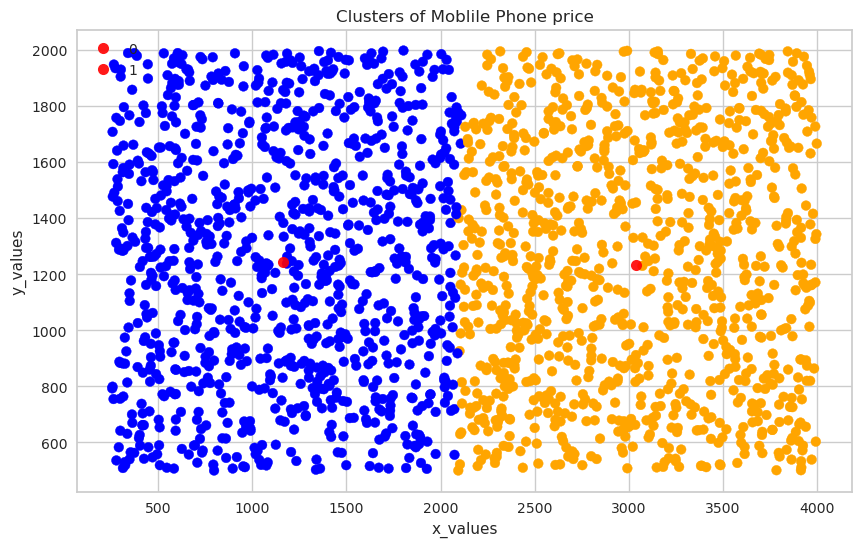

In [60]:
#plot the data after clustering with k = 2
c_preds = kmeans.predict(k_x)
fig = plt.figure(figsize =(10,6))
colors = ['orange', 'blue', 'green', 'pink']
colored = [colors[k] for k in c_preds]
plt.scatter(k_x['ram'], k_x['px_width'], color = colored)
for ci, c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize = 8, color = 'red', alpha = 0.9, label = ''+ str(ci))

plt.title('Clusters of Moblile Phone price')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

****

# **Applying k-mean algorithm with K=3**

In [61]:
#k = 3 
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(k_x)
wscc = kmeans.inertia_
centers = kmeans.cluster_centers_ 
score = silhouette_score(k_x,kmeans.labels_, metric = 'euclidean')
CHI_score = calinski_harabasz_score(k_x, kmeans.labels_)
DB_score = davies_bouldin_score(k_x, kmeans.labels_)

#Within-cluster sum of squares
print('Total within cluster sum of squares for k=3: %.3f' % wscc)
print('-'*50)

#clusters centers
print('clusters centers:')
print(centers)
print('-'*50)

#Silhouetter Score
print('Silhouetter Score of k=3: %.3f' % score)
print('-'*50)

#Calinski-Harabasz Index
print('calinski_harabasz_score of k=3: %.3f' % CHI_score)
print('-'*50)

#Davies-Bouldin Index
print('davies_bouldin_score of k=3: %.3f' % DB_score)
print('-'*50)

Total within cluster sum of squares for k=3: 1397768019.170
--------------------------------------------------
clusters centers:
[[2.21438946e+03 1.21983016e+03 1.23514348e+03 6.49557833e+02
  3.17232796e+01 6.11420205e+00 1.01171303e+01 7.87701318e-01
  1.23016105e+01]
 [9.10347458e+02 1.24982910e+03 1.25800141e+03 6.61728814e+02
  3.15522599e+01 5.90395480e+00 9.65960452e+00 7.38700565e-01
  1.23121469e+01]
 [3.43427258e+03 1.24632841e+03 1.26233662e+03 6.40467980e+02
  3.29835796e+01 6.15435140e+00 9.99014778e+00 7.58620690e-01
  1.23054187e+01]]
--------------------------------------------------
Silhouetter Score of k=3: 0.280
--------------------------------------------------
calinski_harabasz_score of k=3: 1496.415
--------------------------------------------------
davies_bouldin_score of k=3: 1.286
--------------------------------------------------


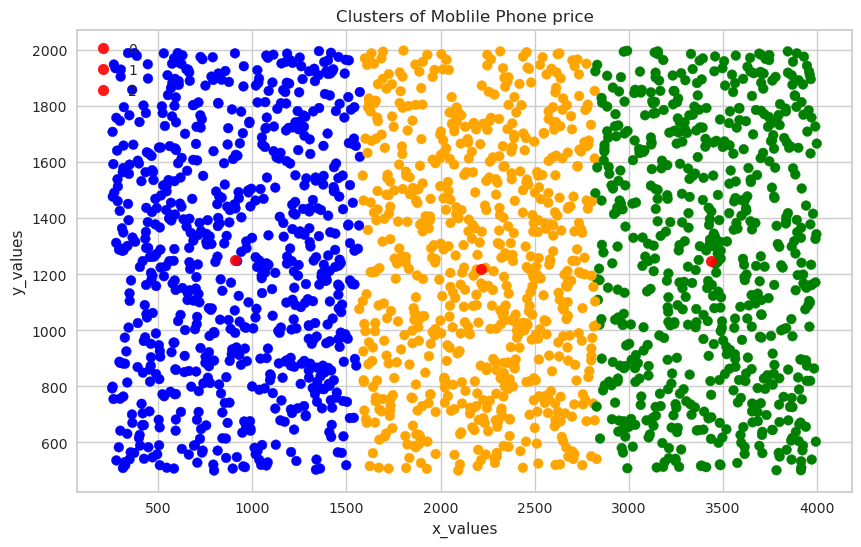

In [62]:
#plot the data after clustering with k = 3
c_preds = kmeans.predict(k_x)
fig = plt.figure(figsize =(10,6))
colors = ['orange', 'blue', 'green', 'pink']
colored = [colors[k] for k in c_preds]
plt.scatter(k_x['ram'], k_x['px_width'], color = colored)
for ci, c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize = 8, color = 'red', alpha = 0.9, label = ''+ str(ci))

plt.title('Clusters of Moblile Phone price')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

****

# **Applying k-mean algorithm with K=4**

In [63]:
#k = 4
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(k_x)
wscc = kmeans.inertia_
centers = kmeans.cluster_centers_ 
score = silhouette_score(k_x,kmeans.labels_, metric = 'euclidean')
CHI_score = calinski_harabasz_score(k_x, kmeans.labels_)
DB_score = davies_bouldin_score(k_x, kmeans.labels_)

#Within-cluster sum of squares
print('Total within cluster sum of squares for k=4: %.3f' % wscc)
print('-'*50)

#clusters centers
print('clusters centers:')
print(centers)
print('-'*50)

#Silhouetter Score
print('Silhouetter Score of k=4: %.3f' % score)
print('-'*50)

#Calinski-Harabasz Index
print('calinski_harabasz_score of k=4: %.3f' % CHI_score)
print('-'*50)

#Davies-Bouldin Index
print('davies_bouldin_score of k=4: %.3f' % DB_score)
print('-'*50)

Total within cluster sum of squares for k=4: 1232248922.490
--------------------------------------------------
clusters centers:
[[2.30911910e+03 1.22898152e+03 1.00970226e+03 4.16030801e+02
  3.18193018e+01 6.11498973e+00 1.02402464e+01 7.88501027e-01
  1.21991786e+01]
 [8.47209226e+02 1.24267381e+03 1.19062273e+03 5.64887974e+02
  3.11400329e+01 5.84843493e+00 9.67380560e+00 7.39703460e-01
  1.22471170e+01]
 [1.85804893e+03 1.23311621e+03 1.65533639e+03 1.15940673e+03
  3.24311927e+01 6.14067278e+00 9.66360856e+00 7.79816514e-01
  1.24831804e+01]
 [3.45776684e+03 1.24523489e+03 1.29067876e+03 6.52119171e+02
  3.29706390e+01 6.16234888e+00 1.00414508e+01 7.51295337e-01
  1.23592401e+01]]
--------------------------------------------------
Silhouetter Score of k=4: 0.267
--------------------------------------------------
calinski_harabasz_score of k=4: 1220.409
--------------------------------------------------
davies_bouldin_score of k=4: 1.275
-----------------------------------------

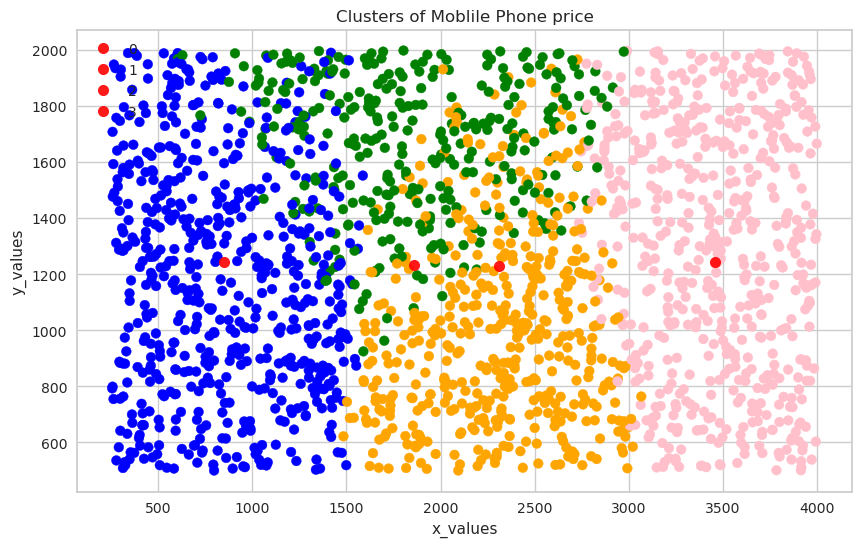

In [64]:
#plot the data after clustering with k = 4
c_preds = kmeans.predict(k_x)
fig = plt.figure(figsize =(10,6))
colors = ['orange', 'blue', 'green', 'pink']
colored = [colors[k] for k in c_preds]
plt.scatter(k_x['ram'], k_x['px_width'], color = colored)
for ci, c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize = 8, color = 'red', alpha = 0.9, label = ''+ str(ci))

plt.title('Clusters of Moblile Phone price')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

# **Comparison between k values used for k_means clustering**

We used 3 evalution methods to compare the results of our clusters: 

1- Silhouette Coefficient, which measures the between-cluster distance against within-cluster distance. 
A higher score signifies better-defined clusters.

2- Calinski-Harabasz Index, which measures the between-cluster dispersion against within-cluster dispersion. 
A higher score signifies better-defined clusters.

3- Davies-Bouldin Index, which measures the size of clusters against the average distance between clusters. 
A lower score signifies better-defined clusters.



[Reference](https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2)


The below table shows our results:

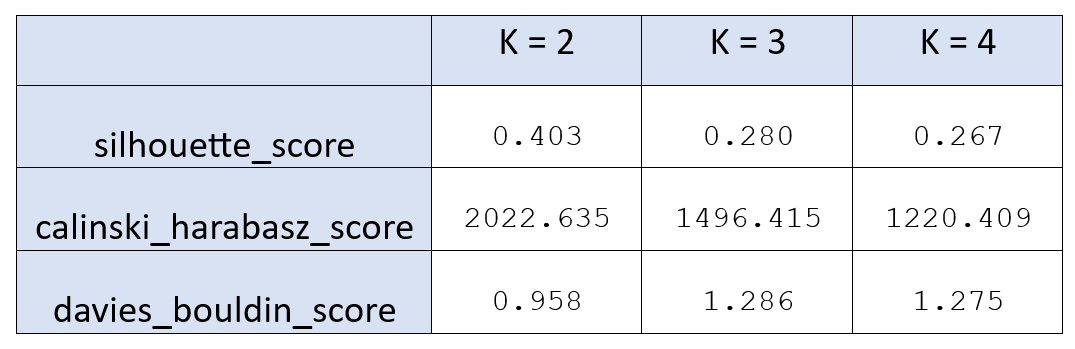

From these resluts we can tell that K=2 has the highest Silhouette Coefficient, and the highest Calinski-Harabasz Index, and the lowest Davies-Bouldin Index. 

making it the optimal K, as mentioned earlier. This will be discussed in more details in the last phase.